Name : Tavhare Ruchita Sharad <br>
class : BE AI&DS <br>
Roll No.: 61<br>
Subject: Computer Laboratory-I(ML)<br>
Title:Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
      location. Perform following tasks:<br>
      1. Pre-process the dataset. <br>
      2. Identify outliers. <br>
      3. Check the correlation. <br>
      4. Implement linear regression and ridge,  Lasso regression models.<br> 
      5. Evaluate the models and compare their respective scores like R2, RMSE, etc. <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 1. Load and Pre-process the Dataset
df = pd.read_csv('uber.csv')  # Change the name to the correct csv file

In [6]:
print("Initial Data Info:")
print(df.info())
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    200

In [9]:
# Drop rows with missing values
df = df.dropna()

In [11]:
# Convert datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [12]:
# Feature Engineering: Extract hour, day, month
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month

In [13]:
# Remove unneeded columns
df = df.drop(columns=['key', 'pickup_datetime'])

In [17]:
# Calculate distance (Haversine formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'], 
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [19]:
# Drop original lat/lon columns
df = df.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

In [21]:
# 2. Identify Outliers (using z-score on fare_amount and distance_km)
from scipy.stats import zscore
df = df[(np.abs(zscore(df[['fare_amount', 'distance_km']])) < 3).all(axis=1)]

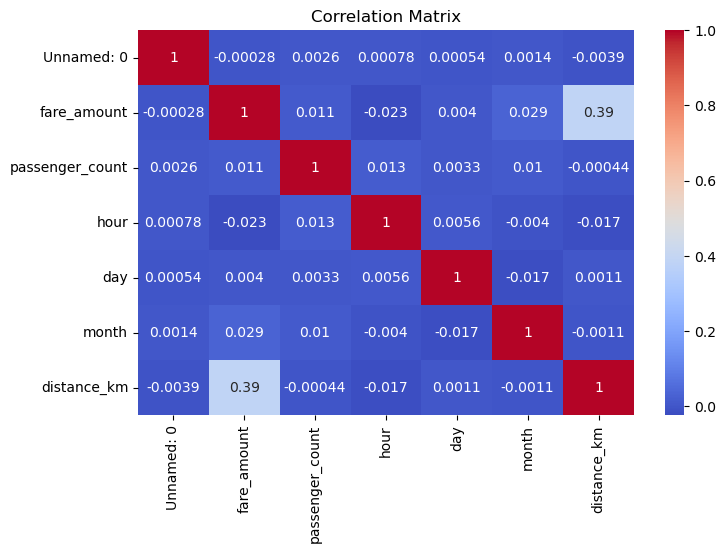

In [23]:
# 3. Check Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
# 4. Regression Models
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

In [27]:
# One-hot encode categorical columns (if any)
X = pd.get_dummies(X, drop_first=True)

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [33]:

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [35]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [37]:
# 5. Model Evaluation
def print_scores(model_name, y_true, y_pred):
    print(f"\n{model_name}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

In [39]:
print_scores("Linear Regression", y_test, y_pred_lr)
print_scores("Ridge Regression", y_test, y_pred_ridge)
print_scores("Lasso Regression", y_test, y_pred_lasso)



Linear Regression
R2 Score: 0.1917
RMSE: 5.8158

Ridge Regression
R2 Score: 0.1917
RMSE: 5.8158

Lasso Regression
R2 Score: 0.1909
RMSE: 5.8187


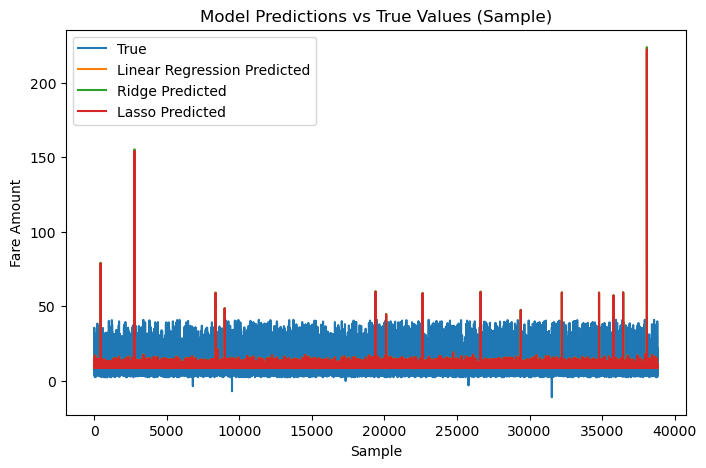

In [41]:
# Optional: Compare visually
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='True')
plt.plot(y_pred_lr, label='Linear Regression Predicted')
plt.plot(y_pred_ridge, label='Ridge Predicted')
plt.plot(y_pred_lasso, label='Lasso Predicted')
plt.title('Model Predictions vs True Values (Sample)')
plt.xlabel('Sample')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()